In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/lingSpam.csv")

In [3]:
df.head(2)

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1


In [4]:
df1 = df.copy()
df1.Body = df.Body.str.replace('*','')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10936/1719775530.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1.Body = df.Body.str.replace('*','')


In [5]:
df1.Body = df1.Body.str.replace('  ','')

In [6]:
df1.Body = df1.Body.str.replace('\n','')
df1.Body = df1.Body.str.replace('- ','')
df1.Body = df1.Body.str.replace('.','')
df1.Body = df1.Body.str.replace('#','')
df1.Body = df1.Body.str.replace('!','')
df1.Body = df1.Body.str.replace('\'','')
df1.Body = df1.Body.str.replace('_','')
df1.Body = df1.Body.str.replace('[','')
df1.Body = df1.Body.str.replace(']','')
df1.Body = df1.Body.str.replace(',','')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10936/1168229245.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1.Body = df1.Body.str.replace('.','')
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10936/1168229245.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1.Body = df1.Body.str.replace('[','')
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10936/1168229245.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1.Body = df1.Body.str.replace(']','')


In [7]:
df1.tail(5)

,Unnamed: 0,Body,Label
2600,2600,Subject: computationally intensive methods in ...,0
2601,2601,Subject: books : a survey of american linguist...,0
2602,2602,Subject: wecol 98 western conference on lingu...,0
2603,2603,Subject: euralex 98 revised programme eurale...,0
2604,2604,"BodyLabel 0""Subject: great part-time or summer...",0


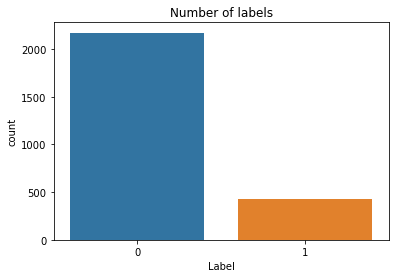

In [205]:
sns.countplot(data = df1 , x = 'Label').set(title ='Number of labels');

- Bag of words : Seuille fréquence des mots
- TF-IDF
- --> CREER des colonnes de text (sklearn)

- PCA , UMAP ,T_SNE  : feature extraction 

## On va faire un resempling avec SMOTE pour balancer la base de donne

In [16]:
x=df1.Body.values

In [17]:
y = np.array(df1.Label).reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split 

In [18]:
x_train , x_test ,y_train , y_test = train_test_split(x,y ,test_size = 0.3)

#### On va Vectoriser les mots et on calcule la fréquence de chaque mot avec TfidVectorizer avec maximmu des variable = 1000

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfv = TfidfVectorizer(max_features = 1000)

In [67]:
x_train_v = tfv.fit_transform(x_train)

In [115]:
print("Type est : {}".format(type(x_train_v)))

Type est : <class 'numpy.ndarray'>


In [69]:
x_train_v = x_train_v.toarray()

In [70]:
print("Type est : {}".format(type(x_train_v)))

numpy.ndarray

In [31]:
x_test_t = tfv.transform(x_test).toarray()

#### On va faire une Compression des variables avec PCA

In [13]:
from sklearn.decomposition import PCA  

In [45]:
pca = PCA(random_state = 42 , n_components = 15)

In [24]:
x_train_red = pca.fit_transform(x_train_v)

In [32]:
x_test_red = pca.transform(x_test_t)

#### On va faire un rechantillonnage on utilisant SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

In [19]:
smt = SMOTE(random_state = 42)

In [72]:
x_train_eq , y_train_eq = smt.fit_resample(x_train_red , y_train)

In [26]:
x_train_eq.shape

(3044, 15)

In [28]:
y_train_eq = y_train_eq.reshape(-1,1)

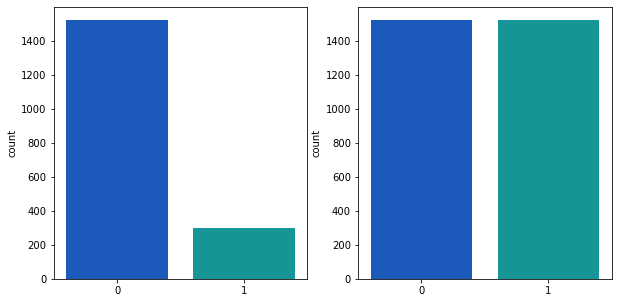

In [206]:
fig, axs = plt.subplots(ncols=2,figsize = (10,5))
sns.countplot(x= y_train.reshape(-1) , ax=axs[0], palette ="winter");
sns.countplot(x= y_train_eq.reshape(-1), ax=axs[1] , palette ="winter");

# On va faire un test avec plusieurs Classifiers

#### On va faire Classification avec KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.metrics import classification_report

In [124]:
knn = KNeighborsClassifier(n_neighbors = 15)

In [125]:
knn.fit(x_train_eq ,y_train_eq)

KNeighborsClassifier(n_neighbors=15)

In [126]:
y_pred_knn = knn.predict(x_test_red)

In [127]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       650
           1       0.87      0.98      0.92       132

    accuracy                           0.97       782
   macro avg       0.93      0.97      0.95       782
weighted avg       0.97      0.97      0.97       782



> Tester le **n_neighbors** le plus **optimal** 

In [175]:
from sklearn.model_selection import GridSearchCV

In [178]:
params = {"n_neighbors" : [1,3,5,7,9,11,13,15]}

In [179]:
knncv = KNeighborsClassifier()

In [180]:
clf= GridSearchCV(knncv ,params , scoring = "accuracy" , cv = 5)

In [181]:
clf.fit(x_train_eq ,y_train_eq)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [183]:
y_pred_cv = clf.predict(x_test_red)

In [186]:
print(clf.best_params_)

{'n_neighbors': 1}


In [184]:
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       650
           1       0.92      0.96      0.94       132

    accuracy                           0.98       782
   macro avg       0.96      0.97      0.96       782
weighted avg       0.98      0.98      0.98       782



#### On va faire Classification avec LogisticRegression

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lr= LogisticRegression()

In [142]:
lr.fit(x_train_eq , y_train_eq)

LogisticRegression()

In [143]:
y_pred_lr = lr.predict(x_test_red)

In [144]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       650
           1       0.94      0.95      0.95       132

    accuracy                           0.98       782
   macro avg       0.97      0.97      0.97       782
weighted avg       0.98      0.98      0.98       782



#### On va faire Classification avec LogisticRegression **Sans SMOTE**

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lr= LogisticRegression()

In [197]:
lr.fit(x_train_red , y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [198]:
y_pred_lr_sans_smt = lr.predict(x_test_red)

In [199]:
print(classification_report(y_test,y_pred_lr_sans_smt))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       650
           1       1.00      0.87      0.93       132

    accuracy                           0.98       782
   macro avg       0.99      0.94      0.96       782
weighted avg       0.98      0.98      0.98       782



#### On va faire Classification avec DecisionTree

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
dt = DecisionTreeClassifier()

In [163]:
dt.fit(x_train_eq ,y_train_eq)

DecisionTreeClassifier()

In [164]:
y_pred_dt = dt.predict(x_test_red)

In [166]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       650
           1       0.91      0.95      0.93       132

    accuracy                           0.98       782
   macro avg       0.95      0.97      0.96       782
weighted avg       0.98      0.98      0.98       782



#### On va faire Classification avec DecisionTree sans SMOTE

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
dt = DecisionTreeClassifier()

In [202]:
dt.fit(x_train_red ,y_train)

DecisionTreeClassifier()

In [203]:
y_pred_dt_sans_smt = dt.predict(x_test_red)

In [204]:
print(classification_report(y_test,y_pred_dt_sans_smt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       650
           1       0.90      0.93      0.92       132

    accuracy                           0.97       782
   macro avg       0.95      0.96      0.95       782
weighted avg       0.97      0.97      0.97       782



> on remarque que le recall et f1-score ont deminue lorsqu'on a eliminer SMOTE pour DecisionTree et LogisticRegression 

#### On va faire Classification avec RandomForest

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rf = RandomForestClassifier(n_estimators = 100)

In [188]:
rf.fit(x_train_eq ,y_train_eq)

RandomForestClassifier()

In [189]:
y_pred_rf = rf.predict(x_test_red)

In [190]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       650
           1       0.91      0.95      0.93       132

    accuracy                           0.98       782
   macro avg       0.95      0.97      0.96       782
weighted avg       0.98      0.98      0.98       782

